In [1]:
from utils import *
from plots import *

In [2]:
p = r'/Users/jquinnlee/Desktop/georepca1/georepca1'
os.chdir(p)

In [3]:
animals = ['QLAK-CA1-08', 'QLAK-CA1-30', 'QLAK-CA1-50', 'QLAK-CA1-51', 'QLAK-CA1-56', 'QLAK-CA1-74', 'QLAK-CA1-75']
animal = animals[0]

#
## Simualte Grid cells, Place cells (naive model), and Boundary vector cells with RatInABox
## following observed animal trajectory

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:17<00:00, 4028.89it/s]


    • To AUTOMATICALLY save all plots (recommended), set  `ratinabox.autosave_plots = True`
    • To MANUALLY save plots, call                        `ratinabox.utils.save_figure(figure_object, save_title).
      This warning will not be shown again


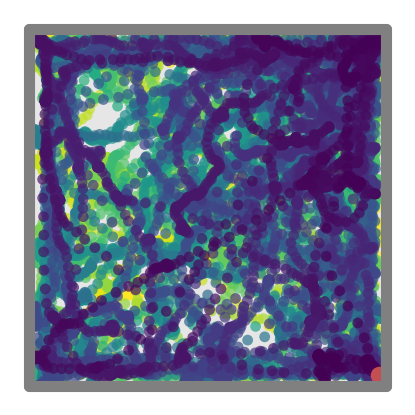

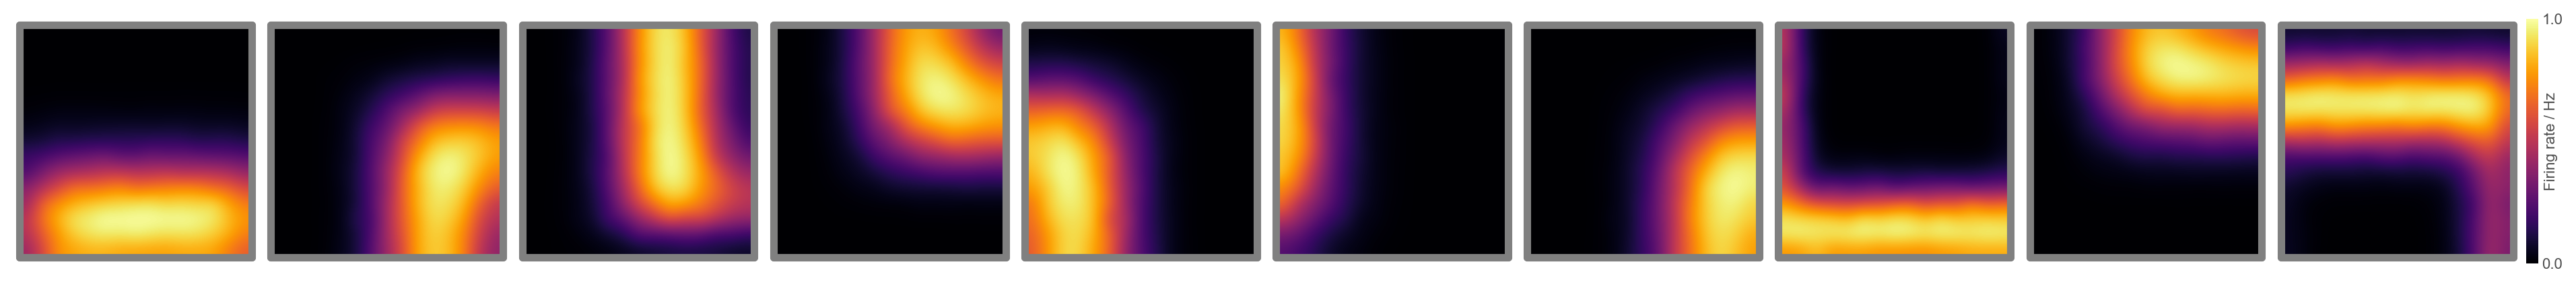

(<Figure size 375x375 with 1 Axes>, <Figure size 3750x375 with 20 Axes>)

In [4]:
plot_riab_example(animal, p)

## Simulate population of grid cells, boundary vector cells, and naive place cells with rate in a box across all days for example animal

In [ ]:
# simulate model predictions from real animal trajectories using ratinabox
n_features = 200
# simulate and save agent and basis set using ratinabox for target animals
bases = ["GC", "BVC", "PC"]
for basis in bases:
    simulate_bases([animal], p, n_features, bases=[basis])

Simulating spike data across days: 0it [00:00, ?it/s]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:07<00:00, 9331.67it/s]
Simulating spike data across days: 1it [00:08,  8.17s/it]

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates:  59%|█████▉    | 42585/71865 [00:04<00:02, 9803.56it/s]

In [ ]:
# build rate maps from simulated bases
for basis in bases:
    get_model_maps([animal], os.path.join(p, "data"), feature_types=[basis], compute_rsm=False)

In [ ]:
# plot example rate maps from each basis
bases = ["GC", "BVC", "PC"]
for basis in bases:
    basis_maps = joblib.load(os.path.join(p, "results", "riab", f"{animal}_{basis}_maps"))
    example_maps = deepcopy(basis_maps)
    example_cells_idx = np.arange(1,200,25)
    example_days_idx = np.arange(20, 31)
    example_maps["smoothed"] = example_maps["smoothed"][:, :, example_cells_idx, :][:, :, :, example_days_idx]
    _ = plot_maps(example_maps, animal,  p, False, example_cells_idx,
                  unsmoothed=False, make_dir=False, cmap='viridis')

In [ ]:
rsm_models_dict = get_model_rsm([animal], p, feature_type='PC')

In [ ]:
# Build dictionary for model RSM with average results, and plot resulting RSM
get_rsm_model_dict([animal], ["PC"], p_models=os.path.join(p, "results", "riab"))
rsm_models = joblib.load(os.path.join(p, "results", "riab", "rsm_models"))
_ = plot_rsm_parts_averaged(rsm_models["PC"]["averaged"], vmin=-.1, vmax=1., cmap="inferno")

## Construct PCs from Grid and BV basis set, using methods described in Solstad et al. (2006) and Barry et al. (2006), respectively

In [ ]:
pc_rate_maps = get_solstad_pc_population(n_pcs=1000, threshold=True)
joblib.dump(pc_rate_maps, os.path.join(p, "results", "riab", "solstad_gc2pc_receptive_fields_th"))

# example animal without boundary-tethering method
np.random.seed(2023)
pc_receptive_fields = joblib.load(os.path.join(p, "results", "riab", "solstad_gc2pc_receptive_fields_th"))
get_gc2pc_maps([animal], p, pc_receptive_fields, threshold=True, compute_rsm=True)

In [ ]:
get_bvc2pc_maps(animal, p, nPCs=200, compute_rsm=True)

## Construct a boundary-tethered version of grid cells, as in Keinath et al. (2018)

In [ ]:
get_bt_gc2pc_maps([animal], p, n_pc=200, threshold=True, compute_rsm=False)

In [ ]:
model_PCs = ["GC2PC_th", "bt_GC2PC_th", "BVC2PC"]
for model in model_PCs:
    model_maps = joblib.load(os.path.join(p, "results", "riab", f"{animal}_{model}_maps"))
    example_maps = deepcopy(model_maps)
    example_cells_idx = np.arange(1,200,25)
    example_days_idx = np.arange(20, 31)
    example_maps["smoothed"] = example_maps["smoothed"][:, :, example_cells_idx, :][:, :, :, example_days_idx]
    _ = plot_maps(example_maps, animal,  p, False, example_cells_idx,
              unsmoothed=False, make_dir=False, cmap='viridis')

In [ ]:
# Build dictionary for model RSM with average results, and plot resulting RSM
get_rsm_model_dict([animal], model_PCs, p_models=os.path.join(p, "results", "riab"))
rsm_models = joblib.load(os.path.join(p, "results", "riab", "rsm_models"))
for model in model_PCs:
    _ = plot_rsm_parts_averaged(rsm_models[model]["averaged"], vmin=-.1, vmax=1., cmap="inferno")

## Next, model place cells as sucessor features, built either from PC basis (George et al., 2024), or BVC basis (de Cothi et al., 2019)

In [ ]:
bases = ["PC", "BVC"]
sr_gamma=0.999
sr_alpha=(50./30.)*10**(-3)
for basis in bases:
    simulate_basis2sf([animal], basis, sr_gamma, sr_alpha)

In [ ]:
# build rate maps and RSMs from model sucessor features
for basis in bases:
    feature_type = f"{basis}2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha"
    get_model_maps([animal], os.path.join(p, "data"), feature_types=[feature_type], compute_rsm=True)

In [ ]:
for basis in bases:
    feature_type = f"{basis}2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha"
    model_maps = joblib.load(os.path.join(p, "results", "riab", f"{animal}_{feature_type}_maps"))
    example_maps = deepcopy(model_maps)
    example_cells_idx = np.arange(1,200,25)
    example_days_idx = np.arange(20, 31)
    example_maps["smoothed"] = example_maps["smoothed"][:, :, example_cells_idx, :][:, :, :, example_days_idx]
    _ = plot_maps(example_maps, animal,  p, False, example_cells_idx,
              unsmoothed=False, make_dir=False, cmap='viridis')

## Plot resulting RSMs

In [ ]:
# Build dictionary for model RSM with average results, and plot resulting RSM
feature_types = [f"{basis}2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha" for basis in bases]
get_rsm_model_dict([animal], feature_types, p_models=os.path.join(p, "results", "riab"))
rsm_models = joblib.load(os.path.join(p, "results", "riab", "rsm_models"))
for feature_type in feature_types:
    _ = plot_rsm_parts_averaged(rsm_models[feature_type]["averaged"], vmin=-.1, vmax=1., cmap="inferno")

In [ ]:
feature_types = ["PC", "GC2PC_th", f"PC2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha", "bt_GC2PC_th", "BVC2PC", f"BVC2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha"]
feature_names = ["PC", "GC2PC", "PC2SF", "bt-GC2PC", "BVC2PC", "BVC2SF"]

get_rsm_model_dict(animals, feature_types, p_models=os.path.join(p, "results", "riab"))
rsm_models = joblib.load(os.path.join(p, "results", "riab", "rsm_models"))
# load the same rsm computed from actual data
rsm_parts_ordered = joblib.load(os.path.join(p, "results", "rsm_parts_ordered"))
rsm_parts_averaged = joblib.load(os.path.join(p, "results", "rsm_parts_averaged"))
# noise marin indicates the noise floor and ceiling (columns) for each animal (rows), rsm mask is to remove tri and nans
noise_margin_agg, rsm_mask_agg = get_noise_margin(rsm_parts_ordered)
n_parts = 9
cols = ["Model", "Fit", "SE", "P value"]
df_agg_bootstrap = pd.DataFrame(data=np.zeros([len(feature_types), len(cols)]) * np.nan, columns=cols)
for f, feature_type in tqdm(enumerate(feature_types), desc='Fitting models to aggregate data with bootstrap procedure',
                            position=0, leave=True):
    fit, se, p_val = get_rsm_fit_bootstrap(rsm_parts_averaged,
                                           rsm_models[feature_type]['averaged'],
                                           method='Tau')
    # df_agg_bootstrap.iloc[f]=np.hstack((feature_type, fit, se, p_val, rsm_models[feature_type]["constant"],
    #                                     rsm_models[feature_type]["scalar"]))
    df_agg_bootstrap.iloc[f] = np.hstack((feature_type, fit, se, p_val))
df_agg_bootstrap.iloc[:, 1:] = df_agg_bootstrap.iloc[:, 1:].astype(float)

# verbose bootstrap for one-way anova of model effects
cols = ["Model", "Fits"]
n_bootstrap = 100
df_agg_bootstrap_ANOVA = pd.DataFrame(data=np.zeros([len(feature_types) * n_bootstrap, len(cols)]), columns=cols)
c = 0
for f, feature_type in tqdm(enumerate(feature_types), desc='Fitting models to aggregate data with bootstrap procedure',
                            position=0, leave=True):
    fits = get_rsm_fit_bootstrap_verbose(rsm_parts_averaged, rsm_models[feature_type]['averaged'], n_bootstrap,
                                         method='Tau')

    df_agg_bootstrap_ANOVA.iloc[c:c+n_bootstrap, :] = np.vstack((np.tile(f, n_bootstrap), fits)).T
    c += n_bootstrap
df_agg_bootstrap_ANOVA.iloc[:, 1] = df_agg_bootstrap_ANOVA.iloc[:, 1].astype(float)
formula = 'Fits ~ C(Model)'
lm = ols(formula, df_agg_bootstrap_ANOVA).fit()
print(f"One-way ANOVA for effect of model on predicting CA1 representation: \n{anova_lm(lm)}")

sns.set(style='dark', font_scale=2.)
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
bp = sns.barplot(data=df_agg_bootstrap, x=df_agg_bootstrap["Model"], y=df_agg_bootstrap["Fit"], width=.5,
                 saturation=1., palette='cool', edgecolor='k', linewidth=4, errcolor='k', errwidth=0.)
for pt, patch in enumerate(bp.patches):
    plt.errorbar(x=patch.get_x() + .25, y=patch.get_height(), yerr=df_agg_bootstrap['SE'].iloc[pt], c='k',
                 linewidth=4.)
ax.axhline(np.mean(noise_margin_agg[:, 0], axis=0), c='blue', linewidth=4.0, alpha=.6)
ax.axhline(np.mean(noise_margin_agg[:, 1], axis=0), c='blue', linewidth=4.0, alpha=.6)
ax.set_ylim([.0, .75])
ax.set_ylabel("CA1 Fit ($Tau$)", weight='bold')
ax.axhline(0.0, c='k', linewidth=5.)
ax.set_xticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, weight='bold', fontsize=26, rotation=90)
ax.set_xlabel("")
plt.setp(ax.spines.values(), color='k', linewidth=5)
plt.tight_layout()
plt.show()

## How does model fit vary across sequences?

In [ ]:

## How do the models fit for each sequence?
rsm_parts_sequences = np.nanmean(rsm_parts_ordered, axis=1)
n_seq = rsm_parts_sequences.shape[0]

cols = ["Model", "Fit", "Sequence", "SE"]
df_agg_bootstrap = pd.DataFrame(data=np.zeros([len(feature_types) * n_seq, len(cols)]) * np.nan, columns=cols)
count = 0
for f, feature_type in tqdm(enumerate(feature_types), desc='Fitting models to aggregate data with bootstrap procedure',
                            position=0, leave=True):
    for s in range(n_seq):

        fit, se, p_val = get_rsm_fit_bootstrap(rsm_parts_sequences[s],
                                               rsm_models[feature_type]['averaged'],
                                               method='Tau')
        df_agg_bootstrap.iloc[count] = np.hstack((feature_names[f], fit, s, se))
        count += 1
df_agg_bootstrap.iloc[:, 1:] = df_agg_bootstrap.iloc[:, 1:].astype(float)

# verbose bootstrap for one-way anova of model effects
cols = ["Model", "Sequence", "Fits"]
n_bootstrap = 100
df_agg_bootstrap_ANOVA = pd.DataFrame(data=np.zeros([len(feature_types) * n_bootstrap * n_seq, len(cols)]),
                                      columns=cols)
c = 0
for f, feature_type in tqdm(enumerate(feature_types), desc='Fitting models to aggregate data with bootstrap procedure',
                            position=0, leave=True):
    for s in range(n_seq):
        fits = get_rsm_fit_bootstrap_verbose(rsm_parts_sequences[s], rsm_models[feature_type]['averaged'], n_bootstrap,
                                             method='Tau')

        df_agg_bootstrap_ANOVA.iloc[c:c+n_bootstrap, :] = np.vstack((np.tile(f, n_bootstrap), np.tile(s, n_bootstrap),
                                                                     fits)).T
        c += n_bootstrap
df_agg_bootstrap_ANOVA.iloc[:, 1:] = df_agg_bootstrap_ANOVA.iloc[:, 1:].astype(float)
formula = 'Fits ~ C(Model) + C(Sequence) + C(Model):C(Sequence)'
lm = ols(formula, df_agg_bootstrap_ANOVA).fit()
print(f"Two-way ANOVA for effect of model on predicting CA1 representation across sequences: \n{anova_lm(lm)}")


sns.set(style='dark', font_scale=2.)
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
bp = sns.barplot(data=df_agg_bootstrap, hue=df_agg_bootstrap["Model"], y=df_agg_bootstrap["Fit"],
                 x=df_agg_bootstrap["Sequence"], width=.7, saturation=1.,
                 palette='cool', edgecolor='k', linewidth=4, errcolor='k',
                 legend=False)
for pt, patch in enumerate(bp.patches):
    if pt < df_agg_bootstrap.shape[0]:
        plt.errorbar(x=patch.get_x() + .06, y=patch.get_height(), yerr=df_agg_bootstrap['SE'].iloc[pt], c='k',
                     linewidth=4.)
ax.axhline(np.mean(noise_margin_agg[:, 0], axis=0), c='blue', linewidth=4.0, alpha=.6)
ax.axhline(np.mean(noise_margin_agg[:, 1], axis=0), c='blue', linewidth=4.0, alpha=.6)
ax.set_ylim([0.0, .75])
ax.set_ylabel("CA1 Fit ($Tau$)", weight='bold')
ax.axhline(0.0, c='k', linewidth=5.)
ax.set_xticks(np.arange(n_seq))
ax.set_xticklabels(np.arange(n_seq) + 1, weight='bold', fontsize=28, rotation=0)
ax.set_xlabel("Sequence", weight="bold")
plt.setp(ax.spines.values(), color='k', linewidth=5)
# plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(p, "Figures", "rsm_model_comparison_sequences.svg"))
fig.savefig(os.path.join(p, "Figures", "rsm_model_comparison_sequences.png"), dpi=300)

In [ ]:

## How do the models fit different sets of comparisons - same environment/different partitions; different environmet
# same partitions; different environment/different partitions?

rsm_parts_animals = get_rsm_partitioned_sequences(animals, agg=False, p=os.path.join(p, "data"))

# create boolean masks for matching and nonmatching partitions allocentrically using cannon labels
cannon_labels = rsm_parts_animals["cannon_labels"]
parts_mesh = np.meshgrid(cannon_labels[:, 1].astype(float), cannon_labels[:, 1].astype(float))
parts_match = parts_mesh[0] == parts_mesh[1]
parts_nonmatch = parts_mesh[0] != parts_mesh[1]

# then further break down nonmatch to same and different envirionments
same_env_mesh = np.meshgrid(cannon_labels[:, 0], cannon_labels[:, 0])
parts_nonmatch_senv = same_env_mesh[0] == same_env_mesh[1]
parts_nonmatch_senv[:9, 90:] = False
parts_nonmatch_senv[90:, :9] = False
parts_nonmatch_senv[np.eye(parts_nonmatch_senv.shape[0]).astype(bool)] = False
parts_nonmatch_denv = deepcopy(parts_nonmatch)
parts_nonmatch_denv[parts_nonmatch_senv] = False
parts_match_denv = deepcopy(parts_match)
parts_match_denv[np.eye(parts_match.shape[0]).astype(bool)] = False

# now compare parts_nonmatch_senv (diff parts, same env), parts_match_denv (diff env, same parts), and parts_nonmatch_denv (diff env, diff parts)
# to each of the hypotheses
rsm_mask = ~np.isnan(rsm_parts_averaged)
rsm_mask[np.tri(rsm_mask.shape[0], k=0).astype(bool)] = False

# how well does each hypothesis explain different partitions, same environment?
comp_masks = np.stack((np.logical_and(rsm_mask, parts_nonmatch_senv), np.logical_and(rsm_mask, parts_match_denv),
                       np.logical_and(rsm_mask, parts_nonmatch_denv)))
cols = ["Model", "Comparison", "Tau", "SE", "P value"]
df_hypo_comps = pd.DataFrame(data=np.zeros([comp_masks.shape[0] * len(feature_types), len(cols)]), columns=cols)
c = 0
for m, mask in enumerate(comp_masks):
    temp = deepcopy(rsm_parts_averaged)
    temp[~mask] = np.nan
    for f, feature_type in enumerate(feature_types):
        temp_model = deepcopy(rsm_models[feature_type]['averaged'])
        temp_model[~mask] = np.nan
        # fits = get_rsm_fit_bootstrap_verbose(temp.T, temp_model.T,
        #                                      n_bootstrap, method='Tau')
        fit, se, p_val = get_rsm_fit_bootstrap(temp.T, temp_model.T,
                                               method='Tau')
        if m == 0:
            comp_name = "SE-DP"
        elif m == 1:
            comp_name = "DE-SP"
        elif m == 2:
            comp_name = "DE-DP"
        df_hypo_comps.iloc[c] = np.hstack((feature_names[f], comp_name, fit, se, p_val))
        c+=1
df_hypo_comps["Tau"] = df_hypo_comps["Tau"].astype(float)
df_hypo_comps["SE"] = df_hypo_comps["SE"].astype(float)


sns.set(style='dark', font_scale=2.)
fig = plt.figure(figsize=(12, 5))

ax = plt.subplot(131)
bp = sns.barplot(data=df_hypo_comps[df_hypo_comps["Comparison"] == "SE-DP"],
                 x=df_hypo_comps["Model"][df_hypo_comps["Comparison"] == "SE-DP"],
                 y=df_hypo_comps["Tau"][df_hypo_comps["Comparison"] == "SE-DP"], width=.5,
                 saturation=1., palette='cool', edgecolor='k', linewidth=4, errcolor='k', errwidth=0.)
for pt, patch in enumerate(bp.patches):
    plt.errorbar(x=patch.get_x() + .25, y=patch.get_height(), yerr=df_hypo_comps['SE'].iloc[pt], c='k',
                 linewidth=4.)
# ax.axhline(np.mean(noise_margin_agg[:, 0], axis=0), c='k', linewidth=4.0, alpha=.6)
ax.set_ylim([-.2, .75])
ax.set_ylabel("CA1 Fit ($Tau$)", weight='bold')
ax.axhline(0.0, c='k', linewidth=5.)
ax.set_xticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, weight='bold', fontsize=26, rotation=90)
ax.set_xlabel("")
plt.setp(ax.spines.values(), color='k', linewidth=5)

ax = plt.subplot(132)
bp = sns.barplot(data=df_hypo_comps[df_hypo_comps["Comparison"] == "DE-SP"],
                 x=df_hypo_comps["Model"][df_hypo_comps["Comparison"] == "DE-SP"],
                 y=df_hypo_comps["Tau"][df_hypo_comps["Comparison"] == "DE-SP"], width=.5,
                 saturation=1., palette='cool', edgecolor='k', linewidth=4, errcolor='k', errwidth=0.)
for pt, patch in enumerate(bp.patches):
    plt.errorbar(x=patch.get_x() + .25, y=patch.get_height(), yerr=df_hypo_comps['SE'].iloc[pt], c='k',
                 linewidth=4.)
# ax.axhline(np.mean(noise_margin_agg[:, 0], axis=0), c='blue', linewidth=4.0, alpha=.6)
ax.set_ylim([-.2, .75])
ax.set_ylabel("CA1 Fit ($Tau$)", weight='bold')
ax.axhline(0.0, c='k', linewidth=5.)
ax.set_xticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, weight='bold', fontsize=26, rotation=90)
ax.set_xlabel("")
plt.setp(ax.spines.values(), color='k', linewidth=5)


ax = plt.subplot(133)
bp = sns.barplot(data=df_hypo_comps[df_hypo_comps["Comparison"] == "DE-DP"],
                 x=df_hypo_comps["Model"][df_hypo_comps["Comparison"] == "DE-DP"],
                 y=df_hypo_comps["Tau"][df_hypo_comps["Comparison"] == "DE-DP"], width=.5,
                 saturation=1., palette='cool', edgecolor='k', linewidth=4, errcolor='k', errwidth=0.)
for pt, patch in enumerate(bp.patches):
    plt.errorbar(x=patch.get_x() + .25, y=patch.get_height(), yerr=df_hypo_comps['SE'].iloc[pt], c='k',
                 linewidth=4.)
# ax.axhline(np.mean(noise_margin_agg[:, 0], axis=0), c='blue', linewidth=4.0, alpha=.6)
ax.set_ylim([-.2, .75])
ax.set_ylabel("CA1 Fit ($Tau$)", weight='bold')
ax.axhline(0.0, c='k', linewidth=5.)
ax.set_xticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, weight='bold', fontsize=26, rotation=90)
ax.set_xlabel("")
plt.setp(ax.spines.values(), color='k', linewidth=5)

plt.tight_layout()
plt.show()

fig.savefig(os.path.join(p, "Figures", "rsm_model_comparison_conditions.svg"))
fig.savefig(os.path.join(p, "Figures", "rsm_model_comparison_conditions.png"), dpi=300)


In [ ]:
rsm_models = joblib.load(os.path.join(p, "results", "riab", "rsm_models"))
n_bootstrap = 100
cols = ["Model", "Comparison", "Tau"]
df_hypo_comps = pd.DataFrame(data=np.zeros([comp_masks.shape[0] * len(feature_types) * n_bootstrap, len(cols)]),
                             columns=cols)
c = 0
for m, mask in enumerate(comp_masks):
    temp = deepcopy(rsm_parts_averaged)
    temp[~mask] = np.nan
    for f, feature_type in enumerate(feature_types):
        temp_model = deepcopy(rsm_models[feature_type]['averaged'])
        temp_model[~mask] = np.nan
        fits = get_rsm_fit_bootstrap_verbose(temp.T, temp_model.T,
                                             n_bootstrap, method='Tau')
        # fit, se, p_val = get_rsm_fit_bootstrap(temp.T, temp_model.T,
        #                                        method='Tau')
        if m == 0:
            comp_name = "SE-DP"
        elif m == 1:
            comp_name = "DE-SP"
        elif m == 2:
            comp_name = "DE-DP"
        df_hypo_comps.iloc[c:c+n_bootstrap] = np.vstack((np.tile(feature_names[f], n_bootstrap),
                                                            np.tile(comp_name, n_bootstrap), fits)).T
        c+=n_bootstrap
df_hypo_comps["Tau"] = df_hypo_comps["Tau"].astype(float)
formula = 'Tau ~ C(Model) + C(Comparison) + C(Model):C(Comparison)'
lm = ols(formula, df_hypo_comps).fit()
print(f"Two-way ANOVA for effect of model and comparison type on predicting CA1 representation: \n{anova_lm(lm)}")